In [1]:
import eurostat
import warnings
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import copy
import pytz
import seaborn as sns
import scipy.stats as stats
import statsmodels
from tabulate import tabulate
from functools import reduce
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
import matplotlib.patches as mpatches
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import GammaRegressor
from scipy.stats import gamma
from sklearn.linear_model import TweedieRegressor
import matplotlib.gridspec as gridspec
from sklearn.linear_model import HuberRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, ExpSineSquared, WhiteKernel, ConstantKernel, RationalQuadratic, Exponentiation, PairwiseKernel
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.dummy import DummyRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.inspection import partial_dependence, plot_partial_dependence
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC, LinearRegression, Ridge, RidgeCV
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

warnings.filterwarnings('ignore')

C:\Users\StefanRaychev\anaconda3\lib\site-packages\scipy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\StefanRaychev\anaconda3\lib\site-packages\scipy\.libs\libopenblas.3HBPCJB5BPQGKWVZAVEBXNNJ2Q2G3TUP.gfortran-win_amd64.dll
C:\Users\StefanRaychev\anaconda3\lib\site-packages\scipy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def POINT (df_link, name, arg1, arg2, *args):
    list_age = ['Y15-64']
    list_education = ['TOTAL']
    list_sex = ['T']
    
    df = eurostat.get_data_df(df_link)
    df = df.loc[(df['age'].isin (list_age)) & (df['sex'].isin(list_sex)) & (df["isced11"].isin(list_education))]
    #print(df["age"].unique())
    #print(df["sex"].unique())
    #print(df["isced11"].unique())
    df1 = df.drop(['unit','sex', 'age', "isced11"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)

def POVERTY (df_link, name, arg1, arg2, *args):
    list_age = ['Y_GE18']
    list_sex = ['T']
    list_edu = ['TOTAL']

    df = eurostat.get_data_df(df_link)
    df = df.loc[(df['age'].isin (list_age)) & (df['sex'].isin(list_sex)) & (df['sex'].isin(list_sex)) & (df['isced11'].isin(list_edu))]
    #print(df["age"].unique())
    #print(df["sex"].unique())
    #print(df["isced11"].unique())
    df1 = df.drop(['sex', 'age', "isced11"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)
    
def LEAVERS (df_link, name, arg1, arg2, *args):
    list_wstatus = ['POP']
    list_sex = ['T']
    list_citizen = ['TOTAL']
    
    df = eurostat.get_data_df(df_link)
    df = df.loc[ (df['wstatus'].isin (list_wstatus)) & (df['sex'].isin(list_sex)) & (df['citizen'].isin(list_citizen))] 
    #print(df["age"].unique())
    #print(df["sex"].unique())
    df1 = df.drop(['unit', 'citizen', 'wstatus', "sex", "age"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)

def NEETS (df_link, name, arg1, arg2, *args):
    list_sex = ['T']
    list_isced11 = ['TOTAL']
    list_age = ['Y15-34']

    df = eurostat.get_data_df(df_link)
    df = df.loc[ (df['age'].isin (list_age)) & (df['sex'].isin(list_sex)) & (df['isced11'].isin(list_isced11))] 
    #print(df["age"].unique())
    #print(df["sex"].unique())
    #print(df["isced11"].unique())
    df1 = df.drop(['unit', 'isced11', 'wstatus', "training" ,"sex", "age"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)

def PARTICIPATION  (df_link, name, arg1, arg2, *args):
    list_sex = ['T']
    list_age = ['Y25-64']

    df = eurostat.get_data_df(df_link)
    df = df.loc[ (df['age'].isin (list_age)) & (df['sex'].isin(list_sex))] 
    #print(df["age"].unique())
    #print(df["sex"].unique())
    df1 = df.drop(['unit' ,"sex", "age"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)

def GINI (df_link, name, arg1, arg2, *args):
    df = eurostat.get_data_df(df_link)
    df1 = df.drop(['indic_il'], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)
    
def RANDD (df_link, name, arg1, arg2, *args):
    list_sectperf = ['TOTAL']
    list_unit = ['PC_GDP']

    df = eurostat.get_data_df(df_link)
    df = df.loc[ (df['sectperf'].isin (list_sectperf)) & (df['unit'].isin(list_unit))] 
    #print(df["unit"].unique())
    #print(df["sectperf"].unique())
    df1 = df.drop(['unit' ,"sectperf"], axis=1)
    globals()[name] = df1.melt(id_vars=list(args), var_name=arg1, value_name=arg2)
    globals()[name] = globals()[name].reset_index(drop=True)

In [3]:
POINT ("lfsa_ergaed", "df_employment", 'Date', 'employment', "geo\\time")
POINT ("lfsa_urgaed", "df__unemployment", 'Date', 'unemployment', "geo\\time")
POINT ("lfsa_argaed", "df_activity", 'Date', 'labor_activity' , "geo\\time")
POVERTY ("ilc_peps04", "df_poverty", 'Date', 'poverty', "geo\\time")
NEETS ("edat_lfse_21", "df_neets", 'Date', 'neets', "geo\\time")
PARTICIPATION ("trng_lfse_01", "df_participation", 'Date', 'LLL', "geo\\time")
GINI ("ilc_di12", "df_gini", 'Date', 'gini', "geo\\time")

In [4]:
df_economics = reduce(lambda x,y: pd.merge(x,y, on = ['Date','geo\\time'], how='outer'), 
               [df_employment, df__unemployment, df_activity, df_poverty, 
                df_neets, df_participation, df_gini])
df_economics.rename(columns={"geo\\time": "country"}, inplace=True)
df_economics = df_economics[df_economics['Date'] != 'unit']
df_economics['Date'] = df_economics['Date'].astype(float)
df_economics['Date'] = df_economics['Date'].astype(int)
df_economics['poverty'] = df_economics['poverty'].astype(float)
df_economics['Date'] = pd.to_datetime(df_economics['Date'], format='%Y')
df_economics['Date'] = df_economics['Date'].dt.year
df_economics = df_economics.sort_values(by=['Date'])
df_economics = df_economics.reset_index(drop=True)
df_economics

,country,Date,employment,unemployment,labor_activity,poverty,neets,LLL,gini
0,MT,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CZ,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DE,1983,59.9,6.5,64.1,NaN,NaN,NaN,NaN
3,DK,1983,70.3,9.9,78.0,NaN,NaN,NaN,NaN
4,EA20,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1783,NO,2022,77.7,3.3,80.4,NaN,7.7,21.1,27.5
1784,NL,2022,81.8,3.5,84.7,NaN,5.4,26.4,26.3
1785,MT,2022,77.6,3.0,80.0,NaN,7.4,12.8,31.1
1786,ME,2022,NaN,NaN,NaN,NaN,NaN,NaN,31.5


In [5]:
df_economics1 = df_economics.dropna()
df_economics1

,country,Date,employment,unemployment,labor_activity,poverty,neets,LLL,gini
847,NO,2003,75.6,4.3,78.9,13.1,11.0,19.3,26.6
854,LU,2003,62.2,3.7,64.6,14.4,10.0,6.5,27.6
858,IE,2003,65.1,4.6,68.2,23.8,14.1,5.9,30.6
863,AT,2003,68.2,4.8,71.7,14.7,8.7,8.6,27.4
865,BE,2003,59.3,7.7,64.3,23.5,17.9,7.0,28.3
...,...,...,...,...,...,...,...,...,...
1687,AT,2020,72.4,5.4,76.6,16.4,10.6,11.7,27.0
1688,BE,2020,64.7,5.6,68.6,18.5,13.4,7.4,25.4
1689,BG,2020,68.5,5.2,72.2,31.8,19.2,1.6,40.0
1690,CY,2020,69.9,7.8,75.8,20.7,15.1,4.7,29.3


In [6]:
df_economics2 = df_economics1.iloc[:, 2:]
df_economics2 = df_economics2.reset_index()
df_economics2 = df_economics2.iloc[:, 1:]
df_economics2

,employment,unemployment,labor_activity,poverty,neets,LLL,gini
0,75.6,4.3,78.9,13.1,11.0,19.3,26.6
1,62.2,3.7,64.6,14.4,10.0,6.5,27.6
2,65.1,4.6,68.2,23.8,14.1,5.9,30.6
3,68.2,4.8,71.7,14.7,8.7,8.6,27.4
4,59.3,7.7,64.3,23.5,17.9,7.0,28.3
...,...,...,...,...,...,...,...
549,72.4,5.4,76.6,16.4,10.6,11.7,27.0
550,64.7,5.6,68.6,18.5,13.4,7.4,25.4
551,68.5,5.2,72.2,31.8,19.2,1.6,40.0
552,69.9,7.8,75.8,20.7,15.1,4.7,29.3


In [7]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_economics2['LLL'], df_economics2["poverty"], test_size=0.2, random_state=42)

In [8]:
def visualize_all_models(df, X_train, X_test, y_train, y_test , cv_num):
    
    df = df.dropna()

    # Sort the X_test and y_test based on the independent variable values
    sort_indices = np.argsort(X_test)
    X_test = X_test.iloc[sort_indices]
    y_test = y_test.iloc[sort_indices]

    # Convert X_train and y_train to NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to NumPy arrays
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    model1 = KernelRidge(kernel='rbf')
    model2 = RadiusNeighborsRegressor(radius=1.0)
    
    voting_model = VotingRegressor([
        ('KernelRidge_rbf', model1),
        ('RadiusNeighborsRegressor', model2)
    ])

    # Define the list of linear regression models
    linear_models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'RidgeCV': RidgeCV(),
        'Lasso': Lasso(),
        'LassoCV': LassoCV(),
        'Lars': Lars(),
        'LarsCV': LarsCV(),
        'LassoLars': LassoLars(),
        'LassoLarsCV': LassoLarsCV(),
        'LassoLarsIC': LassoLarsIC(),
        'ElasticNet': ElasticNet(),
        'ElasticNetCV': ElasticNetCV(),
        'SGDRegressor': SGDRegressor()

    }

    poly_kernel_models = {
        'KernelRidge_poly2': KernelRidge(kernel='poly', degree=2),
        'KernelRidge_poly3': KernelRidge(kernel='poly', degree=3),
        'KernelRidge_poly4': KernelRidge(kernel='poly', degree=4),
        'KernelRidge_laplacian': KernelRidge(kernel='laplacian'),
        'KernelRidge_sigmoid': KernelRidge(kernel='sigmoid'),
        'KernelRidge_rbf': KernelRidge(kernel='rbf')
    }

    decision_tree_ensemble_models = {
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'ExtraTreeRegressor': ExtraTreeRegressor(),
        'ExtraTreesRegressor': ExtraTreesRegressor()
    }
    
    SVR_models = {
        'SVR_linear': SVR(kernel='linear'),
        'SVR_poly': SVR(kernel='poly'),
        'SVR_rbf': SVR(kernel='rbf'),
        'LinearSVR': LinearSVR(),
        'NuSVR': NuSVR()
    }

    nearest_neighbors_models = {
        'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
        'RadiusNeighborsRegressor': RadiusNeighborsRegressor(radius=1.0)
    }

    outliers_models = {
        'RANSACRegressor': RANSACRegressor(),
        'HuberRegressor': HuberRegressor(),
        'TheilSenRegressor': TheilSenRegressor()
    }

    distribution_models = {
        'TweedieRegressor': TweedieRegressor(),
        'PoissonRegressor': PoissonRegressor(),
        'GammaRegressor': GammaRegressor()
    }

    other_models = {
        'IsotonicRegression': IsotonicRegression(out_of_bounds='clip'),
        'DummyRegressor': DummyRegressor(),
        'GaussianProcessRegressor': GaussianProcessRegressor(kernel=DotProduct()),
        'VotingRegressor': voting_model,
        'TransformedTargetRegressor': TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler()),# You can use any regression model here
        'MLPRegressor': MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', learning_rate='adaptive', random_state=42),
        'PLSRegression': PLSRegression(n_components=1)
    }

    glm_models = {
        'GLM': sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Gaussian())
    }



    # Combine all model groups into the model_groups dictionary
    model_groups = {
        'Linear Models': linear_models,
        'Polynomial and Kernel Models': poly_kernel_models,
        'Decision Trees and Ensemble Methods': decision_tree_ensemble_models,
        'SVR models': SVR_models,
        'Nearest Neighbors Regression': nearest_neighbors_models,
        'Outliers Models': outliers_models,
        'Distribution Models': distribution_models,
        'Other models': other_models,
        'GLM (Generalized Linear Models)': glm_models,
    }

    num_rows_cols = {
        'Linear Models': (3, 5),
        'Polynomial and Kernel Models': (2, 3),
        'Decision Trees and Ensemble Methods': (1, 4),
        'SVR models': (1, 5),
        'Nearest Neighbors Regression': (1, 2),
        'Outliers Models': (1, 3),
        'Distribution Models': (1, 3),
        'Other models': (2, 4),
        'GLM (Generalized Linear Models)': (1, 1),  # For GLM, we need only one subplot
    }

    figsize = {
        'Linear Models': (19, 10),
        'Polynomial and Kernel Models': (15, 7),
        'Decision Trees and Ensemble Methods': (15, 3.5),
        'SVR models': (19, 3.5),
        'Nearest Neighbors Regression': (8, 3.5),
        'Outliers Models': (11.5, 3.5),
        'Distribution Models': (11.5, 3.5),
        'Other models': (15, 7),
        'GLM (Generalized Linear Models)': (8, 3.5),  # For GLM, we need a smaller subplot size
    }

    r2_scores = {}
    model_names = []
    metrics = ['MSE', 'MAE', 'RMSE', 'R-squared', 'Adjusted R-squared', 'Explained Variance']
    metric_values = []

    for group_name, group_models in model_groups.items():
        num_rows, num_cols = num_rows_cols[group_name]
        i, b = figsize[group_name]

        fig = plt.figure(figsize=(i, b))
        gs = gridspec.GridSpec(num_rows, num_cols, figure=fig)

        subplot_idx = 0  # Track the current subplot index

        for model_name, model in group_models.items():
            highest_scores = []
            labels = []
            colors = []
            if group_name in ['GLM (Generalized Linear Models)', 'GLMM (Generalized Linear Mixed Models)']:
                # Handle GLM or GLMM differently
                results = model.fit()

                # Make predictions
                y_pred = results.predict(sm.add_constant(X_test))

                # Calculate the evaluation metrics
                mse = mean_squared_error(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                rmse = mean_squared_error(y_test, y_pred, squared=False)
                r2 = r2_score(y_test, y_pred)
                adj_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - 2))
                exp_var = explained_variance_score(y_test, y_pred)

                metric_values.append([mse, mae, rmse, r2, adj_r2, exp_var])
                model_names.append(model_name)
                r2_scores[model_name] = r2
            else:
                X_train_reshaped = X_train.reshape(-1, 1)
                X_test_reshaped = X_test.reshape(-1, 1)

                # Perform k-fold cross-validation here
                cv_results = cross_validate(model, X_train_reshaped, y_train, cv=cv_num, scoring='r2', return_estimator=True)
                # Get the best model based on the cross-validation results
                best_model_idx = np.argmax(cv_results['test_score'])
                best_model = cv_results['estimator'][best_model_idx]

                # Fit the best model on the entire training data
                best_model.fit(X_train_reshaped, y_train)

                # Make predictions on the test data
                y_pred = best_model.predict(X_test_reshaped)

                # Calculate the evaluation metrics
                mse = mean_squared_error(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                rmse = mean_squared_error(y_test, y_pred, squared=False)
                r2 = r2_score(y_test, y_pred)
                adj_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - 2))
                exp_var = explained_variance_score(y_test, y_pred)

                metric_values.append([mse, mae, rmse, r2, adj_r2, exp_var])

                # Save the model name and R² score in the model_names dictionary
                model_names.append(model_name)
                r2_scores[model_name] = r2

            # Replace any nan values in predictions with the mean of the training data
            mean_train_target = np.nanmean(y_train)
            y_pred[np.isnan(y_pred)] = mean_train_target

            r2 = r2_score(y_test, y_pred)

            ax = fig.add_subplot(gs[subplot_idx])
            ax.plot(X_test, y_pred, label=f'{model_name} (R²={r2:.2f})', color='red')
            ax.scatter(X_test, y_test)

            ax.set_xlabel('Independent Variable')
            ax.set_ylabel('Dependent Variable')
            ax.legend(handlelength=0)
            ax.set_title(f'{model_name}')

            subplot_idx += 1

        plt.tight_layout()

    # Create separate subplots for each metric and the R² scores
    fig, axs = plt.subplots(2, 1, figsize=(15, 12))
    
    for i, metric in enumerate(metrics):
        metric_scores = [metric_value[i] for metric_value in metric_values]
        if metric in ['R-squared', 'Adjusted R-squared', 'Explained Variance']:
            best_score = max(metric_scores)
        else:
            best_score = min(metric_scores)
        
        best_indices = [j for j, score in enumerate(metric_scores) if score == best_score]
        best_models = [model_names[j] for j in best_indices]
        highest_scores.append(best_score)
        labels.append(', '.join(best_models))
        colors.extend(['blue'] * len(best_indices))  # Assign blue color to all models initially

    # Change colors for models that share the same highest score
    unique_labels = set(labels)
    color_mapping = dict(zip(unique_labels, ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']))

    for i, label in enumerate(labels):
        colors[i] = color_mapping[label]

    # Bar plot of the highest scoring models for each metric
    rects = axs[0].bar(metrics, highest_scores, color=colors)

    axs[0].set_ylabel('Metric Value')
    axs[0].set_title(f'Comparison of Metrics (Highest Scoring Models) after {cv_num} k-fold cross-validations')
    axs[0].set_ylim(0, max(highest_scores) * 1.2)
    axs[0].set_xticklabels(metrics, rotation=45)

    # Annotate the highest scores on the bars
    for rect, score in zip(rects, highest_scores):
        height = rect.get_height()
        axs[0].annotate(f'{score:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', rotation='vertical')

    # Add the model information to the legend
        legend_patches = []
    unique_colors = list(color_mapping.values())

    for color in unique_colors:
        patch = mpatches.Patch(color=color)
        legend_patches.append(patch)

    axs[0].legend(legend_patches, unique_labels)
    
    # Sort the models based on their R² scores in descending order
    sorted_models = sorted(zip(model_names, r2_scores.values()), key=lambda x: x[1], reverse=True)

    sorted_model_names, sorted_r2_scores = zip(*sorted_models)
    #print(sorted_models)
    #print(sorted_r2_scores)

    # Get the model with the highest R² score
    highest_r2_model_name, highest_r2_score = sorted_models[0]

    # Bar plot of the R² scores for each model (sorted)
    rects = axs[1].bar(sorted_model_names, sorted_r2_scores, color='blue')

    axs[1].set_xlabel('Model')
    axs[1].set_ylabel('R² Score')
    axs[1].set_title('R² Scores for Regression Models (Sorted)')

    # Rotate the x-axis labels for better readability
    axs[1].tick_params(axis='x', rotation=90)
# Annotate the R² scores on top of the bars
    for i, r2 in enumerate(sorted_r2_scores):
        axs[1].text(i, r2, f'{r2:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    # Find the index of the highest R² score model in the sorted_model_names list
    highest_r2_index = sorted_model_names.index(highest_r2_model_name)

    # Highlight the model with the highest R² score in the first bar plot (axs[0])
    rects[highest_r2_index].set_color('gold')

    plt.tight_layout()
    plt.show()

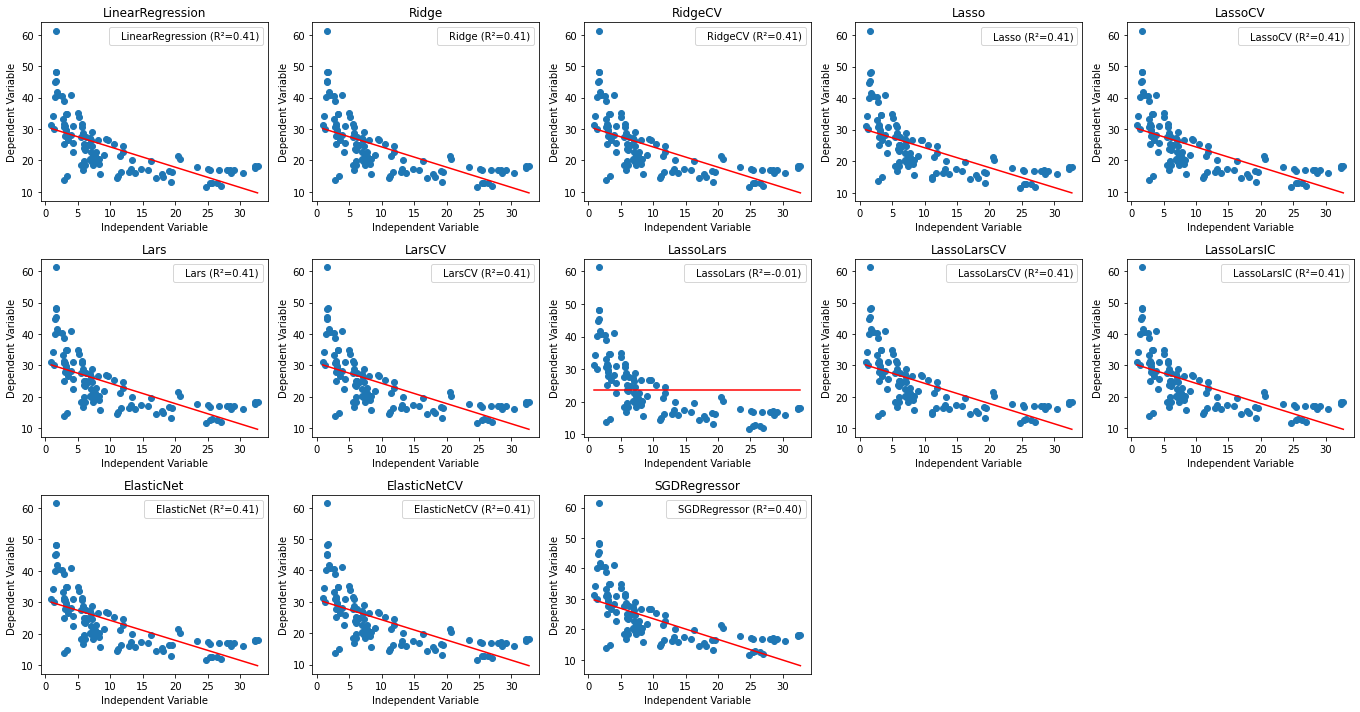

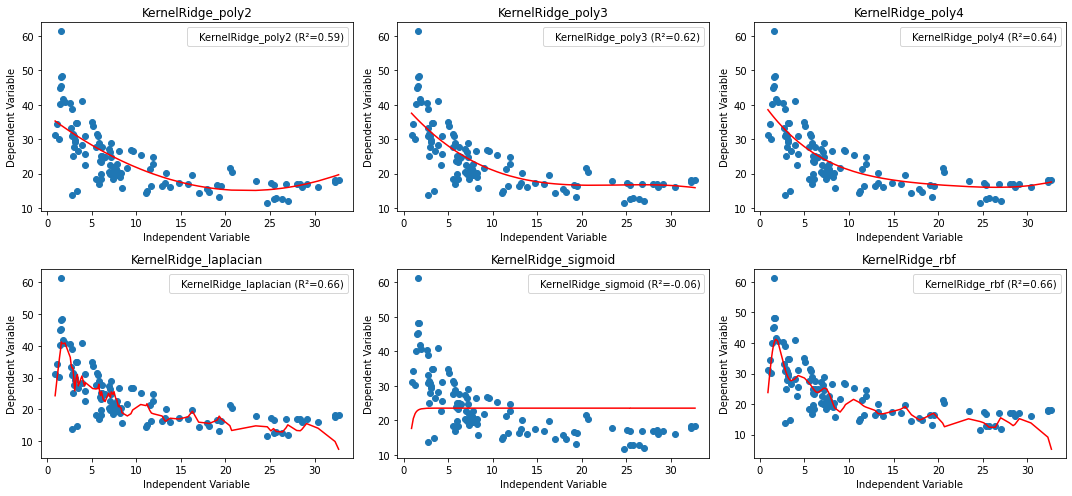

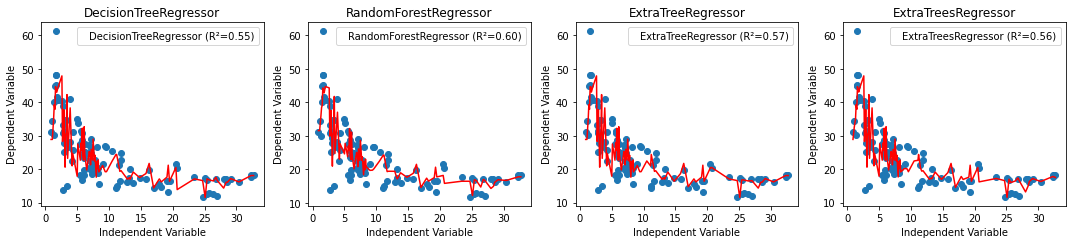

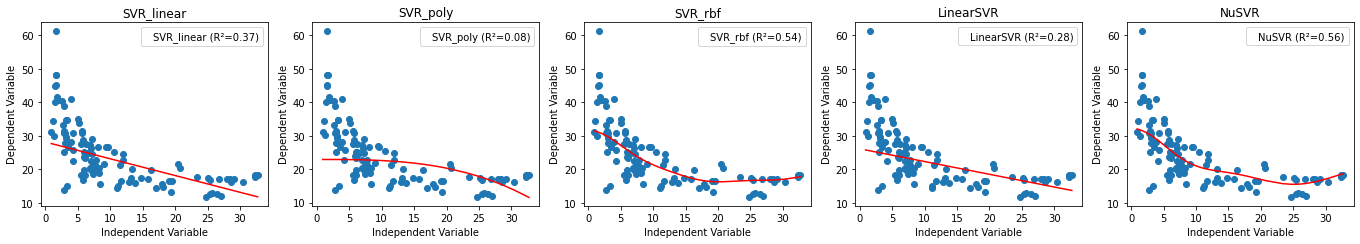

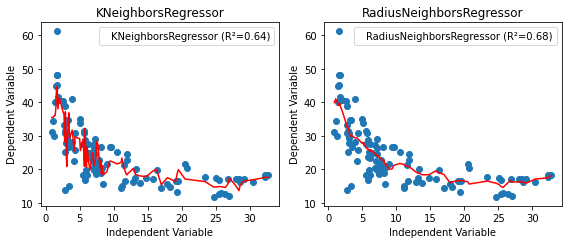

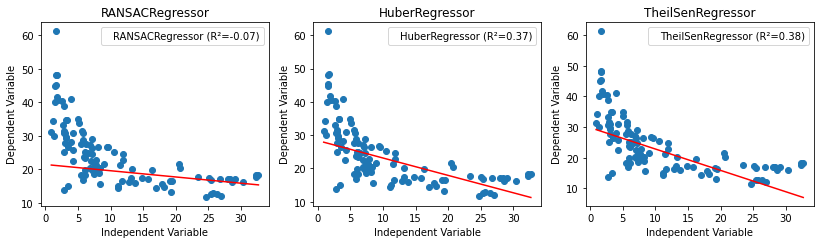

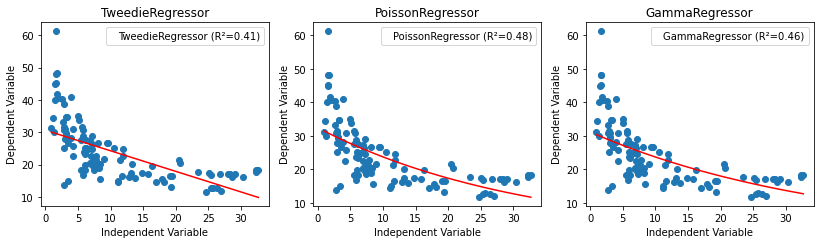

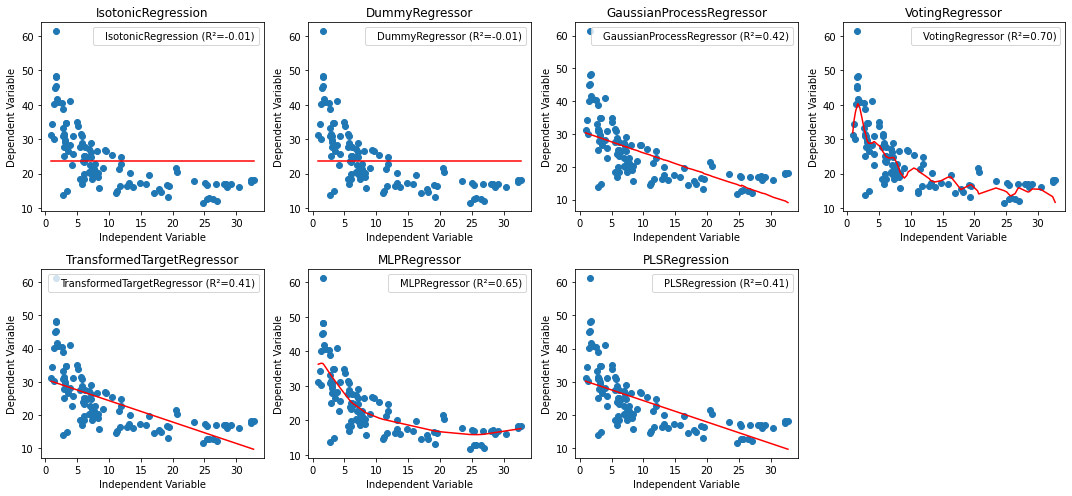

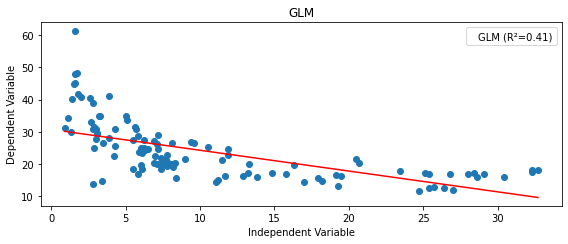

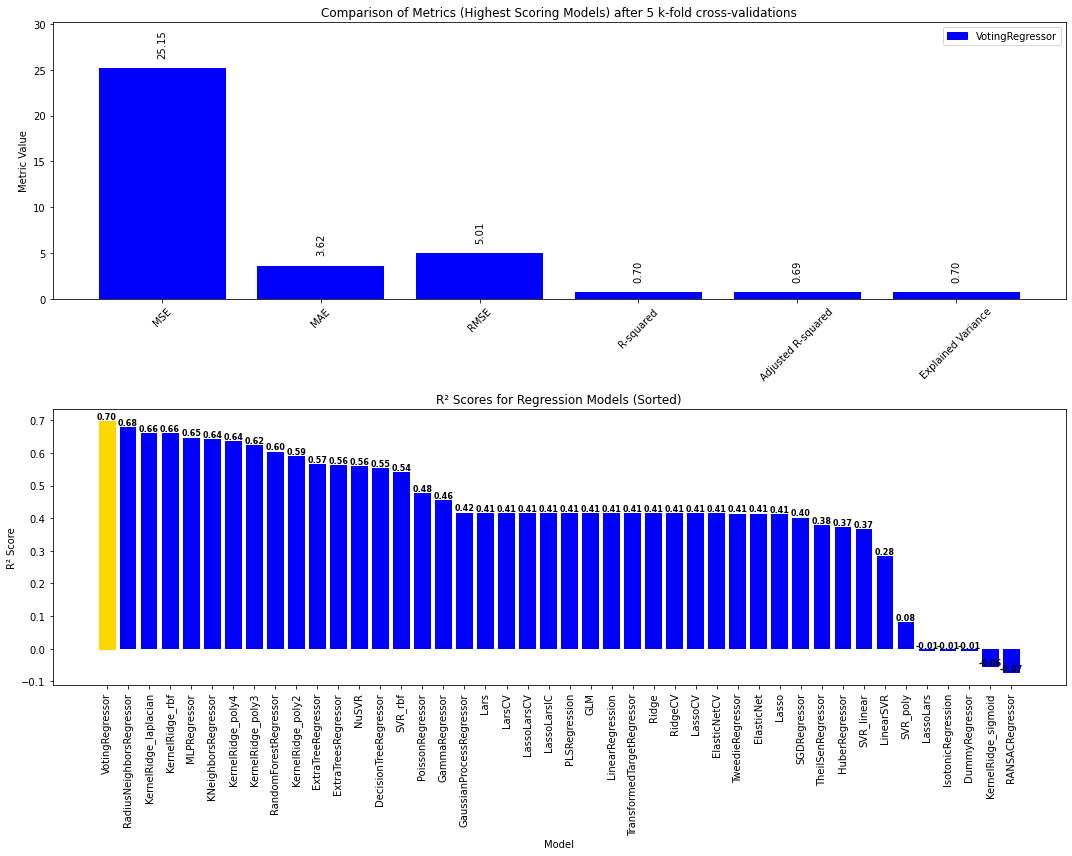

In [9]:
visualize_all_models(df_economics2, X_train1, X_test1, y_train1, y_test1, 5)

In [10]:
def model_calculations(df, X_train, X_test, y_train, y_test, cv_num, model_type, model_mapping, hyperparameters):
    # Get the model and best hyperparameters
    model = model_mapping[model_type]

    # Select the hyperparameters to tune
    params = hyperparameters.get(model_type)

    # Perform grid search if the model has hyperparameters
    if params:
        grid_search = GridSearchCV(model, params, scoring='r2', cv=cv_num)
        grid_search.fit(X_train.reshape(-1, 1), y_train)
        
        cv_results = grid_search.cv_results_

        # Get the best hyperparameter combination
        best_params = grid_search.best_params_

        # Create a deep copy of the default model
        default_model = copy.deepcopy(model)

        # Set the model with the best hyperparameters
        model.set_params(**best_params)

        # Train the model with the best hyperparameters
        model.fit(X_train.reshape(-1, 1), y_train)

        # Train the default model with the original hyperparameters
        default_model.fit(X_train.reshape(-1, 1), y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test.reshape(-1, 1))

        # Calculate the R-squared score with tuned hyperparameters
        y_pred_tuned = model.predict(X_test.reshape(-1, 1))
        r2_tuned = r2_score(y_test, y_pred_tuned)

        # Make predictions with the default model
        y_pred_default = default_model.predict(X_test.reshape(-1, 1))

        # Calculate the R-squared score with default hyperparameters
        r2_default = r2_score(y_test, y_pred_default)

        # Display the R-squared scores
        print(f'R-squared with default hyperparameters: {r2_default:.2f}')
        print(f'R-squared with tuned hyperparameters: {r2_tuned:.2f}')

        # Display the best hyperparameter combination
        print("\nBest Hyperparameter Combination:")
        for name, value in best_params.items():
            print(f"{name}: {value}")

        return default_model, model, params, best_params, r2_default, r2_tuned, cv_results
    else:
        return f"The {model_type} model does not have hyperparameters to tune."

In [11]:
def graph_best_hyperparameters(X_train, y_train, model, best_params):
    # Compute learning curve values
    train_sizes, train_scores, val_scores = learning_curve(model, X_train.reshape(-1, 1), y_train, cv=5, scoring='r2')

    # Plot the learning curve and bar plot of best hyperparameter combination if data is available
    if train_sizes.size > 0:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # Plot learning curve
        ax1.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
        ax1.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label='Validation Score')
        ax1.set_xlabel('Training Set Size')
        ax1.set_ylabel('R-squared Score')
        ax1.set_title('Learning Curve')
        ax1.legend()

        # Bar plot of best hyperparameter combination
        ax2.set_xlabel('Hyperparameters')
        ax2.set_ylabel('Values')
        ax2.set_title('Best Hyperparameter Combination')

        bars = None
        if all(isinstance(value, (int, float)) for value in best_params.values()):
            # If all values are numeric, create a bar plot with numeric values
            bars = ax2.bar(best_params.keys(), best_params.values())
        else:
            # If values are not all numeric, convert them to strings and create a bar plot
            bars = ax2.bar(best_params.keys(), [str(value) for value in best_params.values()])

        for bar in bars:
            height = bar.get_height()
            ax2.annotate(f'{height:.2f}' if isinstance(height, float) else f'{height}', 
                         (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

        plt.tight_layout()
        plt.show()
    else:
        print("Unable to plot learning curve. Insufficient data.")

In [12]:
def graph_cv_scores(model, params, X_train, y_train, cv_results):    
    if params:
        plt.figure(figsize=(10, 5))
        num_hyperparams = len(params)
        rows = int(np.sqrt(num_hyperparams))
        cols = int(np.ceil(num_hyperparams / rows))

        for i, (param_name, param_values) in enumerate(params.items()):
            plt.subplot(rows, cols, i + 1)
            numeric_values = [value for value in param_values if isinstance(value, (int, float))]
            
            if not numeric_values:
                print(f"Skipping {param_name} as it has non-numeric hyperparameter values.")
                continue
                
            # Perform grid search to get the scores for different hyperparameter values
            grid_search = GridSearchCV(model, {param_name: numeric_values}, scoring='r2', cv=5)
            grid_search.fit(X_train.reshape(-1, 1), y_train)

            # Get the cross-validated scores for each hyperparameter combination
            cv_results = grid_search.cv_results_
            mean_scores = cv_results['mean_test_score']
            std_scores = cv_results['std_test_score']

            # Apply logarithmic scale to x-axis if x-values are less than 0.1
            if min(numeric_values) < 0.01:
                plt.semilogx(numeric_values, mean_scores, 'o-')
                plt.xlabel(param_name.capitalize())
            else:
                plt.errorbar(range(len(numeric_values)), mean_scores, yerr=std_scores, fmt='o-', capsize=3)
                plt.xlabel(f'{param_name.capitalize()} (log scale)')
                plt.xticks(range(len(numeric_values)), [str(value) for value in numeric_values])

            plt.xlabel(param_name.capitalize())
            plt.ylabel('R-squared Score')
            plt.title(f'Cross-Validation Scores for {param_name.capitalize()}')

        plt.tight_layout()
        plt.show()

In [13]:
def graph_hyperparameter_hrid(model, params, X_train, y_train, X_test, y_test):
    if len(params) >= 2:
        param_names = list(params.keys())
        param_values = list(params.values())

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        cmap = plt.get_cmap('viridis')
        colors = np.linspace(0, 1, len(param_values[0]))


        for i, (param1, param2) in enumerate(zip(param_values[0], param_values[1])):
            model.set_params(**{param_names[0]: param1, param_names[1]: param2})
            model.fit(X_train.reshape(-1, 1), y_train)
            y_pred = model.predict(X_test.reshape(-1, 1))
            r2 = r2_score(y_test, y_pred)

        # Scatter Plot of Hyperparameter Grid
            if param1 < 0.1:
                ax1.scatter(param1, param2, c=[cmap(colors[i])], s=100, label=f'R-squared: {r2:.2f}')
                ax1.set_xscale('log')
            else:
                ax1.scatter(param1, param2, c=[cmap(colors[i])], s=100, label=f'R-squared: {r2:.2f}')

        ax1.set_xlabel(param_names[0].capitalize())
        ax1.set_ylabel(param_names[1].capitalize())
        ax1.set_title('Scatter Plot of Hyperparameter Grid')
        ax1.legend()
        

In [14]:
def visualize_r2_difference(model, best_params, r2_default, r2_tuned):
    labels = ['Default', 'Tuned']
    r2_scores = [r2_default, r2_tuned]

    plt.bar(labels, r2_scores, color=['blue', 'green'])
    
    for i, r2 in enumerate(r2_scores):
        plt.text(i, r2, f'{r2:.2f}', ha='center', va='bottom')

    plt.xlabel('Model')
    plt.ylabel('R-squared Score')
    plt.title('R-squared Score Comparison')
    plt.ylim(0, 1)  # Adjust the y-axis limit as needed
    plt.show()

In [15]:
def plot_heatmap(params, X_train, X_test, y_train, y_test, model_mapping, model_type ):
    model = model_mapping[model_type]

    param_names = list(params.keys())
    
    if len(param_names) > 2:
        print("Heatmap can only be generated for up to 2 hyperparameters.")
        return
    
    elif len(param_names) < 2:
        print("Heatmap cant be generated for 1 hyperparameter.")
        return
    
    if len(param_names) == 2:
        param1_name, param2_name = param_names
        param1_values = params[param1_name]
        param2_values = params[param2_name]
        heatmap_scores = np.zeros((len(param1_values), len(param2_values)))

        for i, param1 in enumerate(param1_values):
            for j, param2 in enumerate(param2_values):
                model.set_params(**{param1_name: param1, param2_name: param2})
                model.fit(X_train.reshape(-1, 1), y_train)
                y_pred = model.predict(X_test.reshape(-1, 1))
                heatmap_scores[i, j] = r2_score(y_test, y_pred)

        plt.figure(figsize=(8, 6))
        im = plt.imshow(heatmap_scores, cmap='viridis', aspect='auto', origin='lower')
        plt.xlabel(param2_name)
        plt.ylabel(param1_name)
        plt.title(f'Heatmap of Hyperparameter Performance for {model_type}')
        plt.xticks(np.arange(len(param2_values)), param2_values)
        plt.yticks(np.arange(len(param1_values)), param1_values)
        plt.colorbar(im, label='R-squared Score')
    else:
        param_name = param_names[0]
        param_values = params[param_name]
        heatmap_scores = np.zeros((len(param_values), 1))

        for i, param in enumerate(param_values):
            model.set_params(**{param_name: param})
            model.fit(X_train.reshape(-1, 1), y_train)
            y_pred = model.predict(X_test.reshape(-1, 1))
            heatmap_scores[i, 0] = r2_score(y_test, y_pred)

        plt.figure(figsize=(8, 6))
        im = plt.imshow(heatmap_scores, cmap='viridis', aspect='auto', origin='lower')
        plt.xlabel(param_name)
        plt.ylabel('Value')
        plt.title(f'Heatmap of Hyperparameter Performance for {model_type}')
        plt.yticks(np.arange(len(param_values)), param_values)
        plt.colorbar(im, label='R-squared Score')

    plt.tight_layout()
    plt.show()

In [16]:
def plot_3d_hyperparameter_grid(params, model, X_train, y_train, X_test, y_test):
# Scatter Plot of Hyperparameter Grid and Heatmap of Hyperparameter Performance

    param_values = list(params.values())

    if len(params) >= 3:
        param_names = list(params.keys())

        fig = plt.figure(figsize=(14, 5))
        ax3 = fig.add_subplot(121, projection='3d')
        ax4 = fig.add_subplot(122, projection='3d')

        cmap = plt.get_cmap('viridis')
        colors = np.linspace(0, 1, len(param_values[0]))

        for i, (param1, param2, param3) in enumerate(zip(param_values[0], param_values[1], param_values[2])):
            model.set_params(**{param_names[0]: param1, param_names[1]: param2, param_names[2]: param3})
            model.fit(X_train.reshape(-1, 1), y_train)
            y_pred = model.predict(X_test.reshape(-1, 1))
            r2 = r2_score(y_test, y_pred)

            if param1 < 0.1:
                ax3.scatter(param1, param2, param3, c=[cmap(colors[i])], s=100, label=f'R-squared: {r2:.2f}')
                ax3.set_xscale('log')
            else:
                ax3.scatter(param1, param2, param3, c=[cmap(colors[i])], s=100, label=f'R-squared: {r2:.2f}')

        ax3.set_xlabel(param_names[0].capitalize())
        ax3.set_ylabel(param_names[1].capitalize())
        ax3.set_zlabel(param_names[2].capitalize())
        ax3.set_title('Scatter Plot of Hyperparameter Grid')
        ax3.legend()

        param3_values = param_values[2]
        heatmap_scores = np.zeros((len(param_values[0]), len(param_values[1]), len(param3_values)))

        for i, param1 in enumerate(param_values[0]):
            for j, param2 in enumerate(param_values[1]):
                for k, param3 in enumerate(param3_values):
                    model.set_params(**{param_names[0]: param1, param_names[1]: param2, param_names[2]: param3})
                    model.fit(X_train.reshape(-1, 1), y_train)
                    y_pred = model.predict(X_test.reshape(-1, 1))
                    heatmap_scores[i, j, k] = r2_score(y_test, y_pred)

        X, Y, Z = np.meshgrid(param_values[0], param_values[1], param3_values)

        ax4.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=heatmap_scores.flatten(), cmap='viridis')
        ax4.set_xlabel(param_names[0].capitalize())
        ax4.set_ylabel(param_names[1].capitalize())
        ax4.set_zlabel(param_names[2].capitalize())
        ax4.set_title('3D Heatmap of Hyperparameter Performance')

        plt.tight_layout()
        plt.show()

In [17]:
def plot_regression_lines(X, y, tuned_model, default_model, r2_tuned, r2_default):
    # Scatterplot of the data points
    plt.scatter(X, y, label='Data Points', alpha=0.5)

    # Sort the X and y based on the independent variable values
    sort_indices = np.argsort(X)
    X_sorted = X[sort_indices]
    y_sorted = y[sort_indices]

    # Predictions with the default model (in red)
    X_reshaped = X_sorted.reshape(-1, 1)
    y_pred_default = default_model.predict(X_reshaped)
    plt.plot(X_sorted, y_pred_default, label=f'Default Model (R-squared: {r2_default:.2f})', color='red')

    # Predictions with the tuned model (in green)
    y_pred_tuned = tuned_model.predict(X_reshaped)
    plt.plot(X_sorted, y_pred_tuned, label=f'Tuned Model (R-squared: {r2_tuned:.2f})', color='green')

    # Set labels and legend
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    # Show the plot
    plt.show()

In [18]:
def linear_models(df, X_train, X_test, y_train, y_test , cv_num,  model_type):

    # Convert X_train and y_train to NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to NumPy arrays
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Define the hyperparameters to search for each model
    hyperparameters = {
        'LinearRegression': {},
        'Ridge': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]},
        'Lasso': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]},
        'ElasticNet': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100], 'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
        'ElasticNetCV': {'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
        'Lars': {},
        'LarsCV': {},
        'LassoLars': {},
        'LassoLarsCV': {},
        'LassoLarsIC': {},        
        'RidgeCV': {'alphas': [0.1, 1.0, 10.0]},
        'LassoCV':  {'alphas': [0.1, 1.0, 10.0]},
        'SGDRegressor': {'alpha': [0.0001, 0.001, 0.01], 'penalty': ['l1', 'l2'], 'learning_rate': ['constant', 'optimal', 'invscaling']}
    }

    # Map the string model_type to the regression model object
    model_mapping = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'ElasticNetCV': ElasticNetCV(),
        'Lars': Lars(),
        'LarsCV': LarsCV(),
        'LassoLars': LassoLars(),
        'LassoLarsCV': LassoLarsCV(),
        'LassoLarsIC': LassoLarsIC(),
        'RidgeCV': RidgeCV(),
        'LassoCV': LassoCV(),
        'SGDRegressor': SGDRegressor()
    }
    default_model, model, params, best_params, r2_default, r2_tuned, cv_results = model_calculations(df, X_train, X_test, y_train, 
                                                                                           y_test, cv_num, model_type, model_mapping, hyperparameters)

    # Now you have access to model and best_params
    # Call graph11 with these values
    graph_best_hyperparameters(X_train, y_train, model, best_params)
    graph_cv_scores(model, params, X_train, y_train, cv_results)
    graph_hyperparameter_hrid(model, params, X_train, y_train, X_test, y_test)
    visualize_r2_difference(model, best_params, r2_default, r2_tuned)
    plot_heatmap(params, X_train, X_test, y_train, y_test, model_mapping, model_type)
    plot_regression_lines(X_test, y_test, model, default_model, r2_tuned, r2_default)

R-squared with default hyperparameters: 0.41
R-squared with tuned hyperparameters: 0.41

Best Hyperparameter Combination:
alpha: 1.0
l1_ratio: 0.2


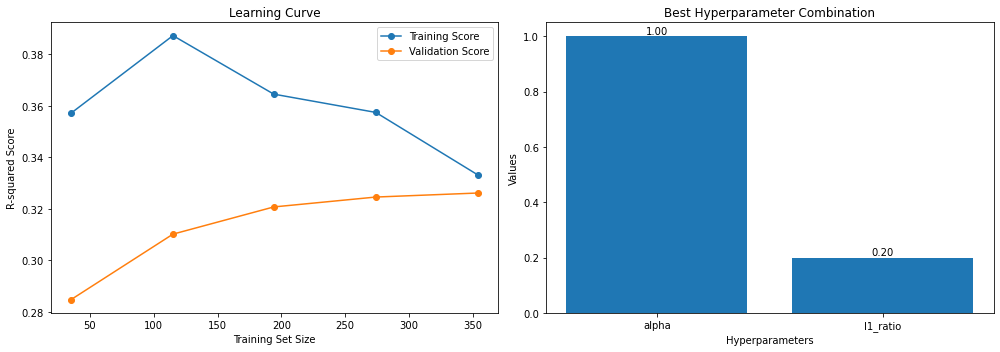

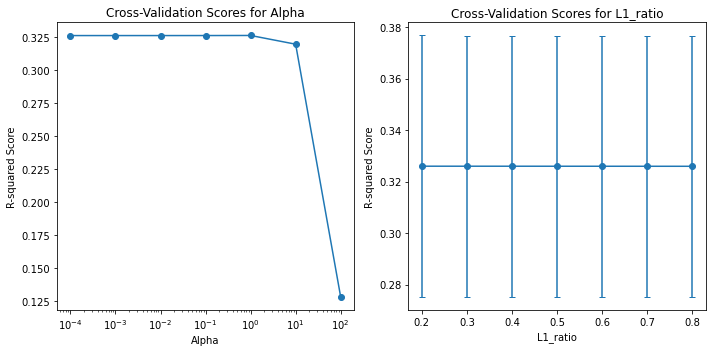

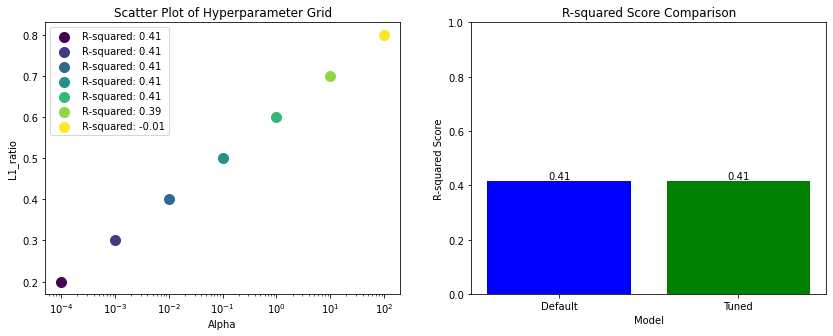

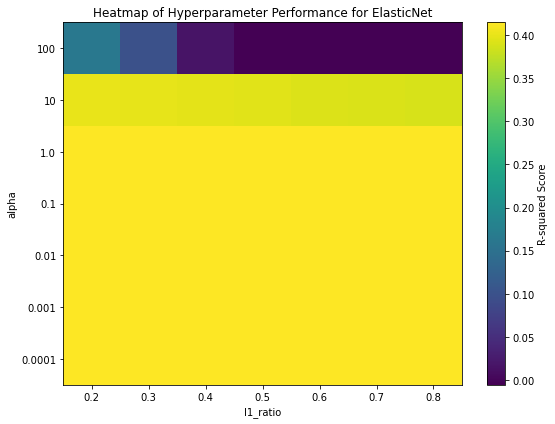

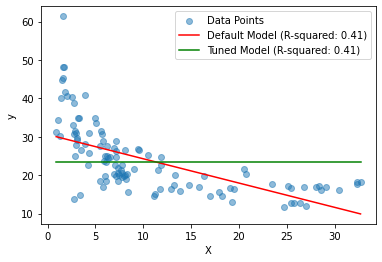

In [19]:
linear_models(df_economics2, X_train1, X_test1, y_train1, y_test1, 5, 'ElasticNet')

In [20]:
def three_models(df, X_train, X_test, y_train, y_test , cv_num,  model_type):
    # Perform train-test split

    # Convert X_train and y_train to NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to NumPy arrays
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Define the hyperparameters to search for each model
    hyperparameters = {
        'DecisionTreeRegressor':{'max_depth':[4,5,6,7,8,9,10], 'min_samples_split':[2,3,4,5,6,7,8], 'min_samples_leaf':[1,2,3,4,5,6,7] },
        'RandomForestRegressor':{'max_depth':[4,5,6,7,8,9,10], 'min_samples_split':[2,3,4,5,6,7,8], 'min_samples_leaf':[1,2,3,4,5,6,7] },
        'ExtraTreeRegressor':{'max_depth':[4,5,6,7,8,9,10], 'min_samples_split':[2,3,4,5,6,7,8], 'min_samples_leaf':[1,2,3,4,5,6,7] },
        'ExtraTreesRegressor':{'max_depth':[4,5,6,7,8,9,10], 'min_samples_split':[2,3,4,5,6,7,8], 'min_samples_leaf':[1,2,3,4,5,6,7] },
    }

    # Map the string model_type to the regression model object
    model_mapping = {
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'ExtraTreeRegressor': ExtraTreeRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor()
    }
    
    # Call model111 to get model and best_params, passing model_mapping
    default_model, model, params, best_params, r2_default, r2_tuned, cv_results = model_calculations(df, X_train, X_test, y_train, 
                                                                                           y_test, cv_num, model_type, model_mapping, hyperparameters)

    # Now you have access to model and best_params
    # Call graph11 with these values
    graph_best_hyperparameters(X_train, y_train, model, best_params)
    graph_cv_scores(model, params, X_train, y_train, cv_results)
    graph_hyperparameter_hrid(model, params, X_train, y_train, X_test, y_test)
    visualize_r2_difference(model, best_params, r2_default, r2_tuned)
    plot_heatmap(params, X_train, X_test, y_train, y_test, model_mapping, model_type)
    plot_3d_hyperparameter_grid(params, model, X_train, y_train, X_test, y_test)
    plot_regression_lines(X_test, y_test, model, default_model, r2_tuned, r2_default)

R-squared with default hyperparameters: 0.56
R-squared with tuned hyperparameters: 0.58

Best Hyperparameter Combination:
max_depth: 5
min_samples_leaf: 5
min_samples_split: 2


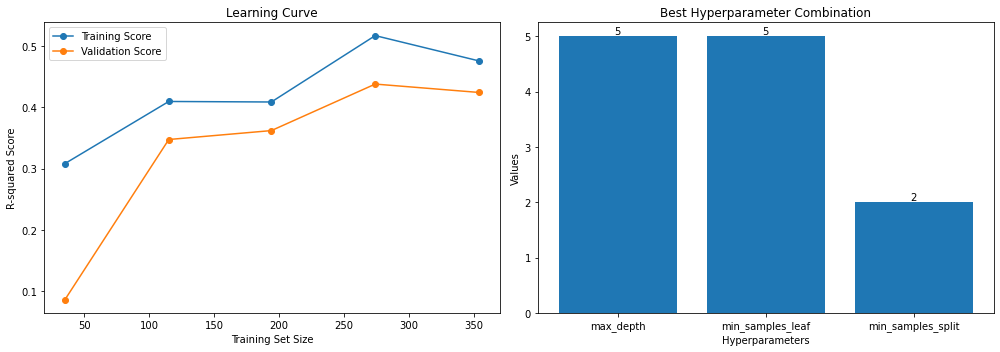

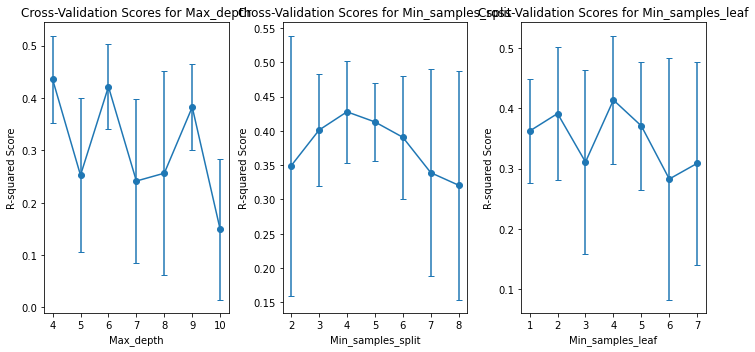

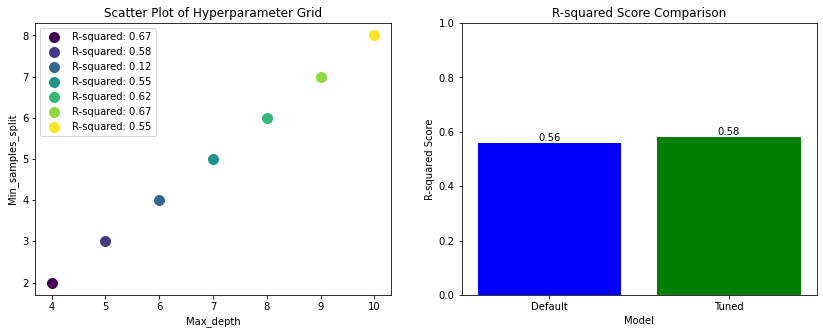

Heatmap can only be generated for up to 2 hyperparameters.


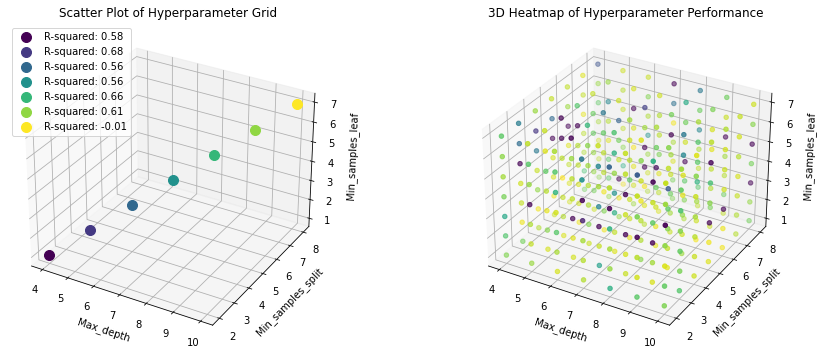

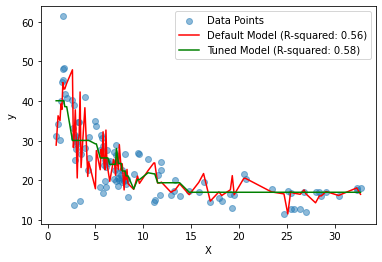

In [21]:
three_models(df_economics2, X_train1, X_test1, y_train1, y_test1, 5, 'ExtraTreeRegressor')

In [22]:
def kernel_models(df, X_train, X_test, y_train, y_test , cv_num,  model_type):

    # Convert X_train and y_train to NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to NumPy arrays
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Define the hyperparameters to search for each model
    hyperparameters = {'KernelRidge':{
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # Regularization strength
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel function options
        'gamma': [0.001, 0.01, 0.1, 1.0, 10.0],  # Kernel coefficient (for 'rbf' and 'poly')
        'degree': [2, 3, 4, 5]}  # Polynomial degree (for 'poly')}
    }

    # Map the string model_type to the regression model object
    model_mapping = {
        'KernelRidge': KernelRidge()

    }

    # Call model111 to get model and best_params, passing model_mapping
    default_model, model, params, best_params, r2_default, r2_tuned, cv_results = model_calculations(df, X_train, X_test, y_train, 
                                                                                           y_test, cv_num, model_type, model_mapping, hyperparameters)

    # Now you have access to model and best_params
    # Call graph11 with these values
    graph_best_hyperparameters(X_train, y_train, model, best_params)
    graph_cv_scores(model, params, X_train, y_train, cv_results)
    graph_hyperparameter_hrid(model, params, X_train, y_train, X_test, y_test)
    visualize_r2_difference(model, best_params, r2_default, r2_tuned)
    plot_heatmap(params, X_train, X_test, y_train, y_test, model_mapping, model_type)
    plot_regression_lines(X_test, y_test, model, default_model, r2_tuned, r2_default)

R-squared with default hyperparameters: -4.38
R-squared with tuned hyperparameters: 0.72

Best Hyperparameter Combination:
alpha: 0.001
degree: 2
gamma: 0.1
kernel: rbf


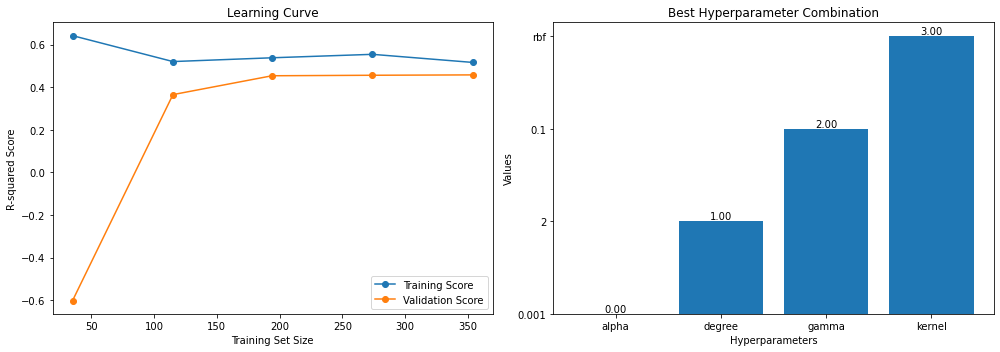

Skipping kernel as it has non-numeric hyperparameter values.


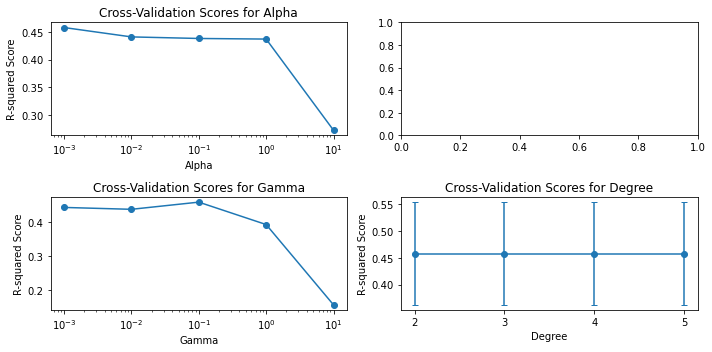

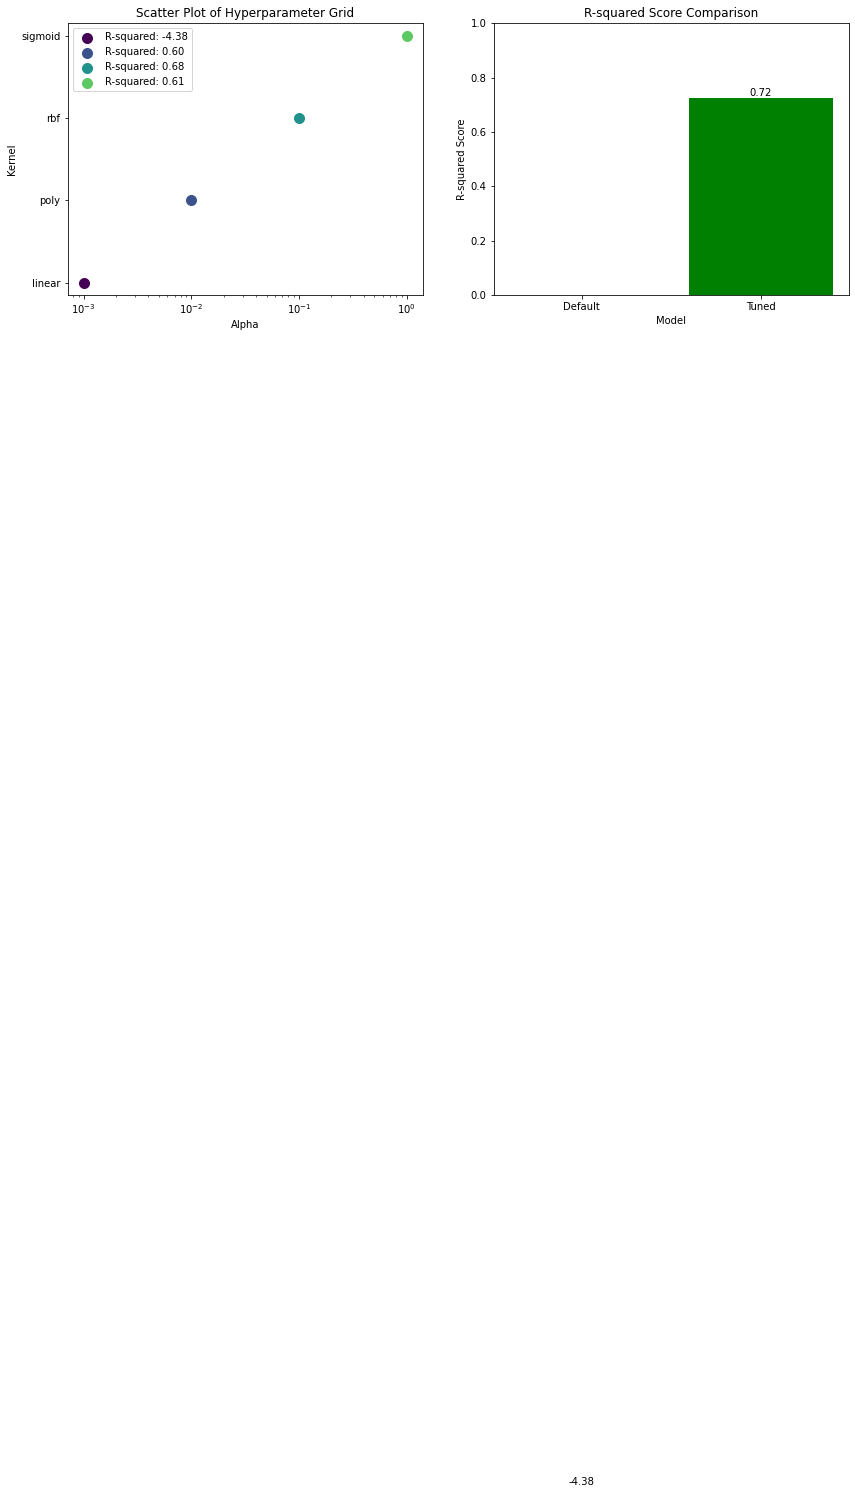

Heatmap can only be generated for up to 2 hyperparameters.


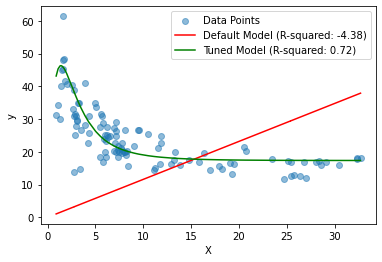

In [23]:
kernel_models(df_economics2, X_train1, X_test1, y_train1, y_test1, 5, 'KernelRidge')

In [24]:
def nearest_neighbors_models(df, X_train, X_test, y_train, y_test , cv_num,  model_type):

    # Convert X_train and y_train to NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to NumPy arrays
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Define the hyperparameters to search for each model
    hyperparameters = {'KNeighborsRegressor': {
    'n_neighbors': [1, 3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used for computation
    'p': [1, 2],  # Power parameter for the Minkowski metric
    },

    'RadiusNeighborsRegressor': {
    'radius': [1.0, 1.5, 2.0, 2.5, 3.0],  # Range of parameter space to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used for computation
    'p': [1, 2],  # Power parameter for the Minkowski metric
    }
    }

    # Map the string model_type to the regression model object
    model_mapping = {
        'KNeighborsRegressor': KNeighborsRegressor(),
        'RadiusNeighborsRegressor': RadiusNeighborsRegressor()

    }
    
    # Call model111 to get model and best_params, passing model_mapping
    default_model, model, params, best_params, r2_default, r2_tuned, cv_results = model_calculations(df, X_train, X_test, y_train, 
                                                                                           y_test, cv_num, model_type, model_mapping, hyperparameters)

    # Now you have access to model and best_params
    # Call graph11 with these values
    graph_best_hyperparameters(X_train, y_train, model, best_params)
    graph_hyperparameter_hrid(model, params, X_train, y_train, X_test, y_test)
    visualize_r2_difference(model, best_params, r2_default, r2_tuned)
    plot_heatmap(params, X_train, X_test, y_train, y_test, model_mapping, model_type)
    plot_regression_lines(X_test, y_test, model, default_model, r2_tuned, r2_default)

R-squared with default hyperparameters: 0.68
R-squared with tuned hyperparameters: 0.68

Best Hyperparameter Combination:
algorithm: auto
p: 1
radius: 1.0
weights: uniform


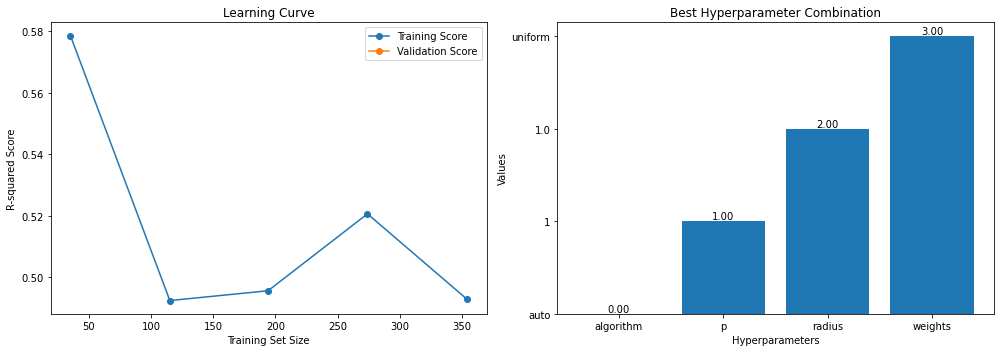

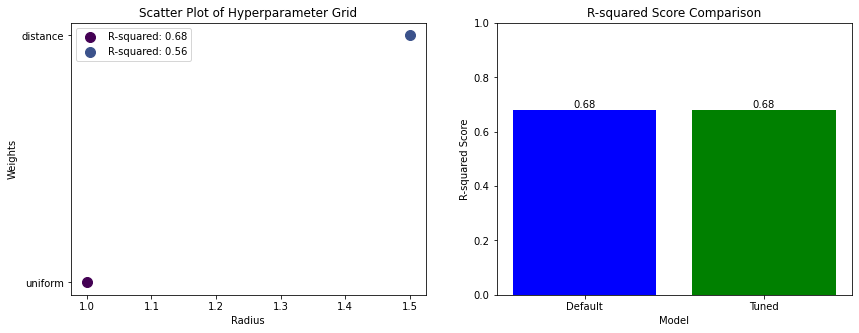

Heatmap can only be generated for up to 2 hyperparameters.


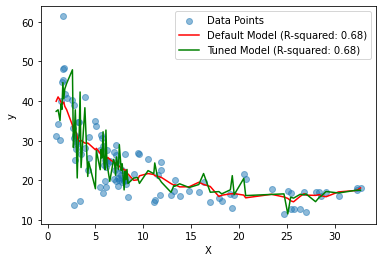

In [25]:
nearest_neighbors_models(df_economics2, X_train1, X_test1, y_train1, y_test1, 5, 'RadiusNeighborsRegressor')

In [26]:
def tune_svr_models(df, X_train, X_test, y_train, y_test , cv_num,  model_type):
    # Perform train-test split

    # Convert X_train and y_train to NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to NumPy arrays
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Define the hyperparameters to search for each model
    hyperparameters = {
        'SVR_linear':{'C':[0.001,0.01,0.1,1,10,100,1000], 'epsilon':[0.001,0.005,0.05,0.01,0.5,0.1,1] },
        'SVR_poly':{'C':[0.001,0.01,0.1,1,10,100,1000], 'epsilon':[0.001,0.005,0.05,0.01,0.5,0.1,1] },
        'SVR_rbf':{'C':[0.001,0.01,0.1,1,10,100,1000], 'epsilon':[0.001,0.005,0.05,0.01,0.5,0.1,1] },
        'LinearSVR':{'C':[0.001,0.01,0.1,1,10,100,1000], 'epsilon':[0.001,0.005,0.05,0.01,0.5,0.1,1] },
        'NuSVR':{'C':[0.001,0.01,0.1,1,10,100,1000], 'nu':[0.001,0.005,0.05,0.01,0.5,0.1,1] },

    }

    # Map the string model_type to the regression model object
    model_mapping = {
        'SVR_linear': SVR(kernel='linear'),
        'SVR_poly': SVR(kernel='poly'),
        'SVR_rbf': SVR(kernel='rbf'),
        'LinearSVR': LinearSVR(),
        'NuSVR': NuSVR()
    }
    
    
    default_model, model, params, best_params, r2_default, r2_tuned, cv_results = model_calculations(df, X_train, X_test, y_train, 
                                                                                           y_test, cv_num, model_type, model_mapping, hyperparameters)

    # Now you have access to model and best_params
    # Call graph11 with these values
    graph_best_hyperparameters(X_train, y_train, model, best_params)
    graph_cv_scores(model, params, X_train, y_train, cv_results)
    graph_hyperparameter_hrid(model, params, X_train, y_train, X_test, y_test)
    visualize_r2_difference(model, best_params, r2_default, r2_tuned)
    plot_heatmap(params, X_train, X_test, y_train, y_test, model_mapping, model_type)
    plot_regression_lines(X_test, y_test, model, default_model, r2_tuned, r2_default)

R-squared with default hyperparameters: 0.56
R-squared with tuned hyperparameters: 0.63

Best Hyperparameter Combination:
C: 10
nu: 0.5


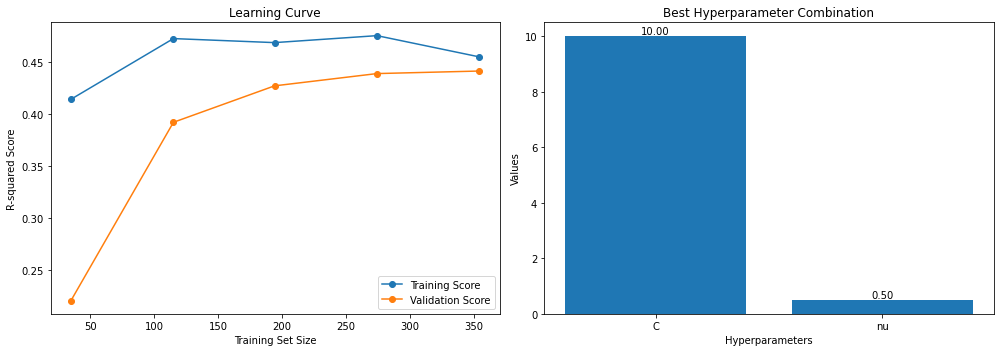

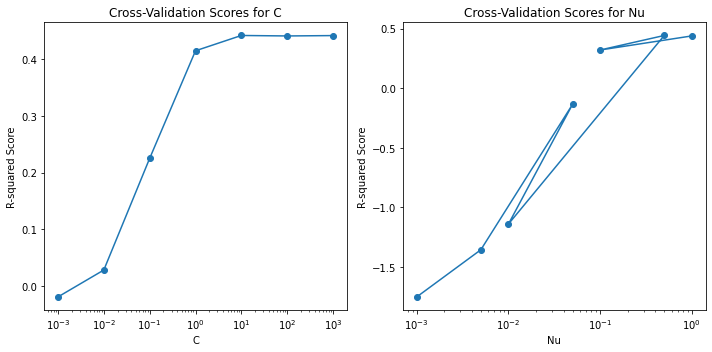

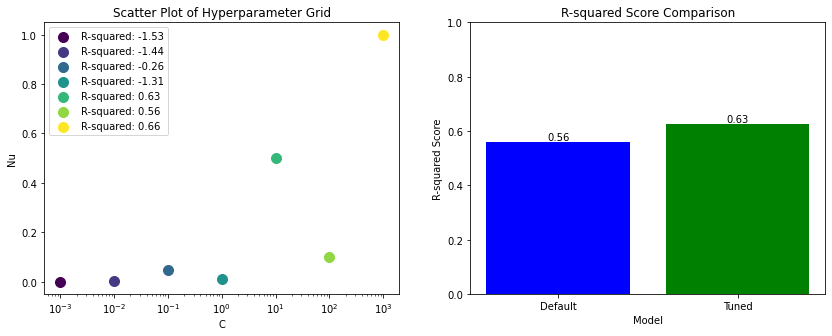

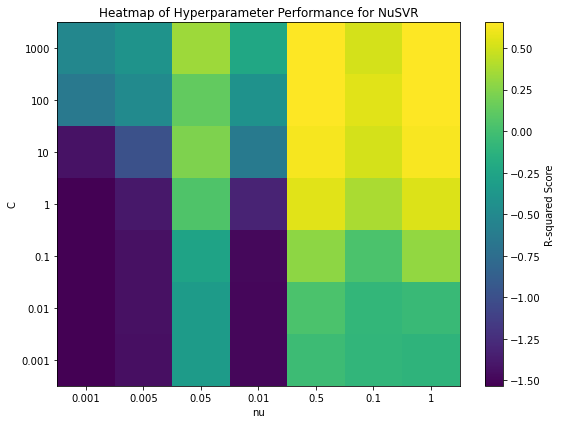

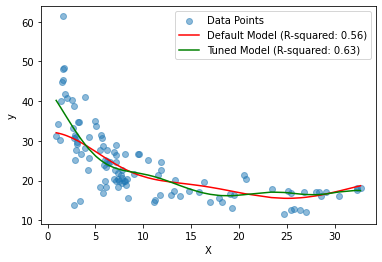

In [27]:
tune_svr_models(df_economics2, X_train1, X_test1, y_train1, y_test1, 5, 'NuSVR')

In [28]:
def other_models(df, X_train, X_test, y_train, y_test , cv_num,  model_type):

    # Convert X_train and y_train to NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to NumPy arrays
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    hyperparameters = {
        'RANSACRegressor': {
            'min_samples': [0.5, 0.75, 1.0],  # The minimum number of samples chosen randomly from the original data
            'residual_threshold': [1.0, 1.5, 2.0],  # The maximum residual for a data point to be classified as an inlier
            'max_trials': [100, 200, 300],  # The maximum number of iterations
        },
        'HuberRegressor': {
            'epsilon': [1.1, 1.35, 1.5],  # The threshold for the squared error loss
            'alpha': [0.0001, 0.001, 0.01],  # The regularization parameter
        },
        'TheilSenRegressor': {
            'n_subsamples': [None, 100, 200],  # The number of subsamples to use
        },
        'TweedieRegressor': {
            'power': [0, 1, 2],  # The power parameter for the Tweedie variance function
            'alpha': [0.1, 0.3, 0.5],  # The regularization parameter
            'link': ['auto', 'identity', 'log'],  # The link function
        },
        'PoissonRegressor': {
            'alpha': [0.1, 0.3, 0.5],  # The regularization parameter
        },
        'GammaRegressor': {
            'alpha': [0.1, 0.3, 0.5],  # The regularization parameter
        },
        'IsotonicRegression': {
            'y_min': [None, 0.0],  # The minimum value of y
            'y_max': [None, 1.0],  # The maximum value of y
            'out_of_bounds': ['nan', 'clip'],  # The strategy to use when x is out of bounds
        },
        'DummyRegressor': {
            'strategy': ['mean', 'median', 'quantile'],  # The strategy to use for prediction
        },
        'GaussianProcessRegressor': {
            'kernel': [RBF(), Matern(), RationalQuadratic()],  # The kernel function
            'n_restarts_optimizer': [0, 1, 2],  # Number of restarts for kernel optimization
            'normalize_y': [False, True],  # Whether to normalize the target values
        },
        'TransformedTargetRegressor': {
            'transformer': [None, PowerTransformer(), QuantileTransformer()],  # The transformer to apply to target
            'regressor': [None, LinearRegression(), RandomForestRegressor()],  # The regressor to use
        },
        'MLPRegressor': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # The number of neurons in the hidden layers
            'activation': ['relu', 'logistic'],  # The activation function for the hidden layers
            'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
            'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule for weight updates
            'learning_rate_init': [0.001, 0.01, 0.1],  # The initial learning rate used
            'max_iter': [200, 300, 500],  # The maximum number of iterations
        },
        'PLSRegression': {
            #'n_components': [2],  # Adjust the number of components based on your needs
            'scale': [True, False],  # Boolean indicating whether to scale the input data
            'tol': [1e-4, 1e-5, 1e-6]  # Tolerance to declare convergence
        }
    }

# Map the string model_type to the regression model object
    model_mapping = {
        'RANSACRegressor': RANSACRegressor(),
        'HuberRegressor': HuberRegressor(),
        'TheilSenRegressor': TheilSenRegressor(),
        'TweedieRegressor': TweedieRegressor(),
        'PoissonRegressor': PoissonRegressor(),
        'GammaRegressor': GammaRegressor(),
        'IsotonicRegression': IsotonicRegression(),
        'DummyRegressor': DummyRegressor(),
        'GaussianProcessRegressor': GaussianProcessRegressor(),
        'TransformedTargetRegressor': TransformedTargetRegressor(),
        'PLSRegression': PLSRegression(),
        'MLPRegressor': MLPRegressor(),
    }

    default_model, model, params, best_params, r2_default, r2_tuned, cv_results = model_calculations(df, X_train, X_test, y_train, 
                                                                                           y_test, cv_num, model_type, model_mapping, hyperparameters)

    # Now you have access to model and best_params
    # Call graph11 with these values
    graph_best_hyperparameters(X_train, y_train, model, best_params)
    graph_cv_scores(model, params, X_train, y_train, cv_results)
    graph_hyperparameter_hrid(model, params, X_train, y_train, X_test, y_test)
    visualize_r2_difference(model, best_params, r2_default, r2_tuned)
    plot_heatmap(params, X_train, X_test, y_train, y_test, model_mapping, model_type)
    plot_regression_lines(X_test, y_test, model, default_model, r2_tuned, r2_default)

R-squared with default hyperparameters: 0.37
R-squared with tuned hyperparameters: 0.38

Best Hyperparameter Combination:
alpha: 0.0001
epsilon: 1.5


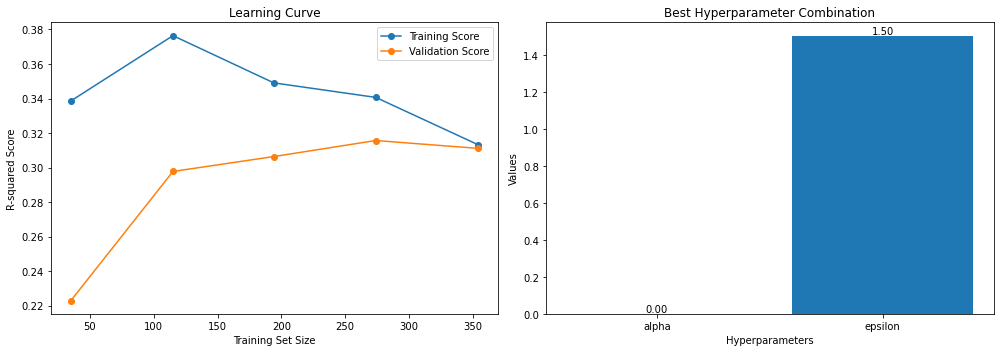

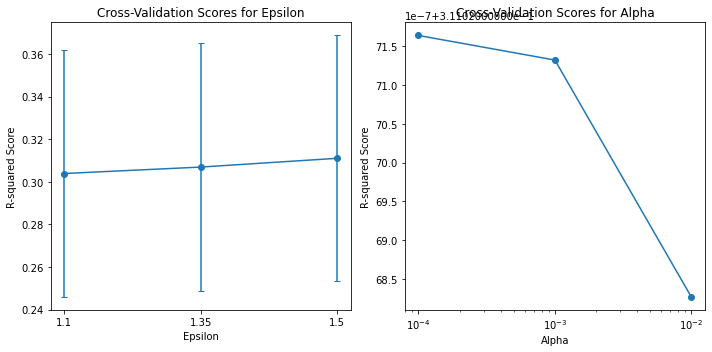

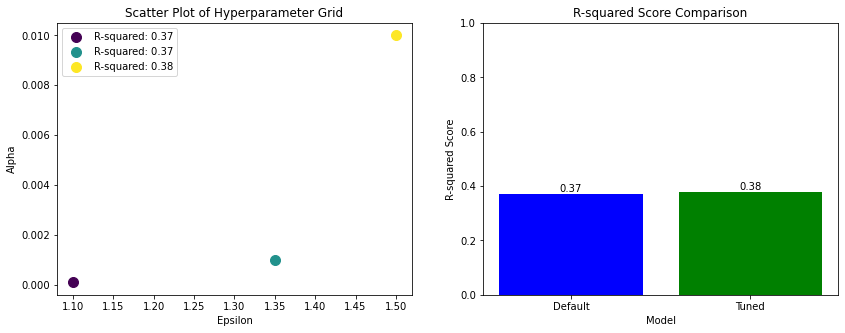

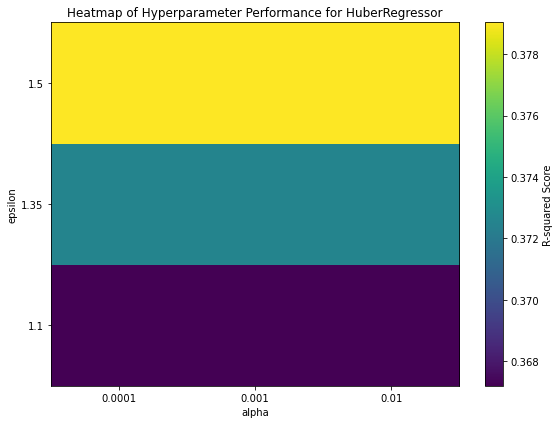

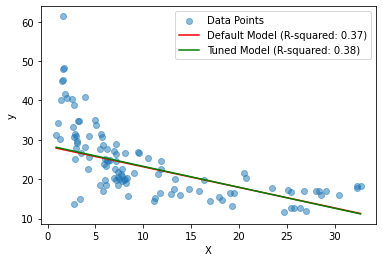

In [29]:
other_models(df_economics2, X_train1, X_test1, y_train1, y_test1, 5, 'HuberRegressor')

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def polynomial_regression(df, X_train, X_test, y_train, y_test, cv_num):
    # Convert X_train and y_train to NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to NumPy arrays
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Define the hyperparameters for Polynomial Regression
    hyperparameters = {
    'PolynomialRegression': {
        'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Degree of polynomial features
    }}
    
    model_mapping = {
        'LinearRegression': LinearRegression(),
        'PolynomialRegression': make_pipeline(PolynomialFeatures(), LinearRegression())
    }

    
    default_model, model, params, best_params, r2_default, r2_tuned, cv_results = model_calculations(df, X_train, X_test, y_train, 
                                                                                           y_test, cv_num, "PolynomialRegression", model_mapping, hyperparameters)

    # Now you have access to model and best_params
    # Call graph11 with these values
    graph_best_hyperparameters(X_train, y_train, model, best_params)
    graph_cv_scores(model, params, X_train, y_train, cv_results)
    graph_hyperparameter_hrid(model, params, X_train, y_train, X_test, y_test)
    visualize_r2_difference(model, best_params, r2_default, r2_tuned)
    plot_heatmap(params, X_train, X_test, y_train, y_test, model_mapping, "PolynomialRegression")
    plot_regression_lines(X_test, y_test, model, default_model, r2_tuned, r2_default)

R-squared with default hyperparameters: 0.60
R-squared with tuned hyperparameters: 0.66

Best Hyperparameter Combination:
polynomialfeatures__degree: 5


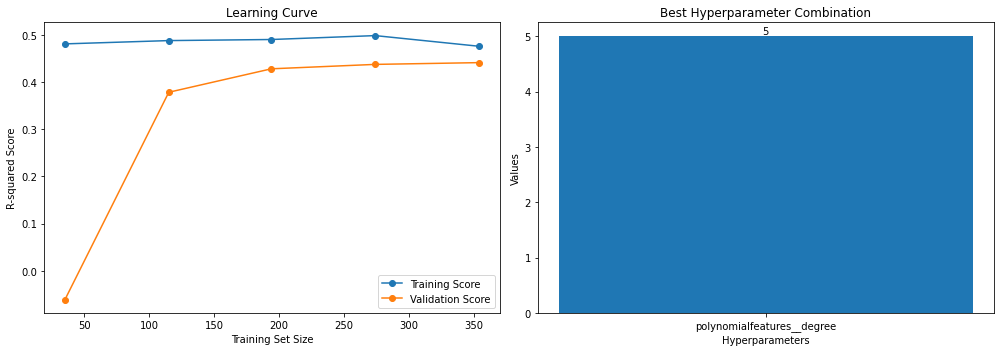

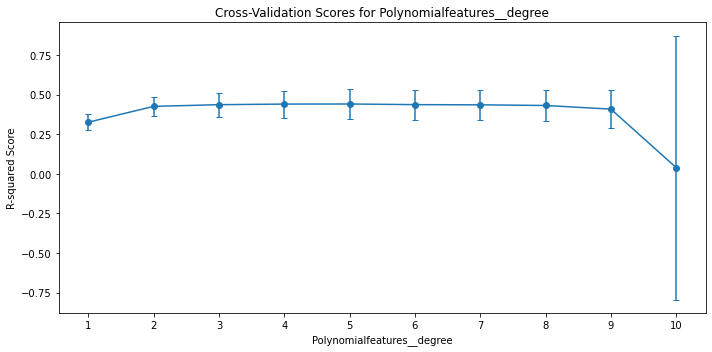

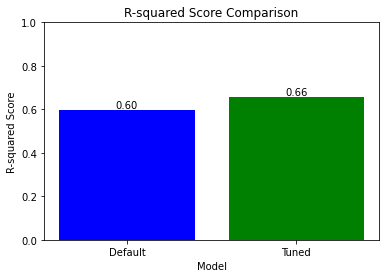

Heatmap cant be generated for 1 hyperparameter.


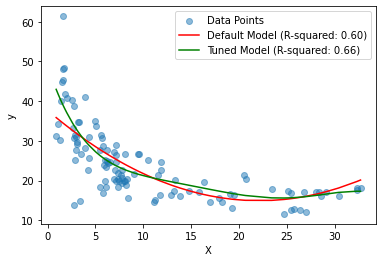

In [31]:
polynomial_regression(df_economics2, X_train1, X_test1, y_train1, y_test1, 5)